In [1]:
import os
import json

import pandas as pd
#df = pd.DataFrame(columns=['post', 'bound', 'index', 'label', 'pred', 'epsilon', 'p_safe_attack': 1.0, 'd_safe_attack': True, 'p_safe_bounds' , 'd_safe_bounds', 'beps', 'bdelt', 'balpha', 'iterations_attack', 'iterations_bounds', 'veri_time', 'attk_time'])
rows = []
def load(post, bound):
    entries = []
    path = "ExperimentalLogs/%s_%s.log"%(post, bound)
    with open(path) as log_file:
        for line in log_file:
            if(json.loads(line)['epsilon'] == 0.0313):
                continue
            #print(json.loads(line))
            entries.append(json.loads(line))
            entry = json.loads(line)
            entry['Posterior'] = post
            entry['Bound'] = bound
            entry['Method'] = 'Attack'
            entry['p_safe_bounds'] = entry['p_safe_attack']
            rows.append(entry)
            entry2 = json.loads(line)
            entry2['Posterior'] = post
            entry2['Bound'] = bound
            entry2['Method'] = 'Cert'
            entry2['p_safe_attack'] = entry2['p_safe_bounds']
            rows.append(entry2)
    return entries

log_info = load("VOGN", "massart")
#log_info = load("NA", "massart")
#log_info = load("SWAG", "massart")

log_info = load("VOGN", "chernoff")
#log_info = load("NA", "chernoff")
#log_info = load("SWAG", "chernoff")

In [2]:
df = pd.DataFrame.from_dict(rows, orient='columns')
df.head()

,index,label,pred,epsilon,p_safe_attack,d_safe_attack,p_safe_bounds,d_safe_bounds,beps,bdelt,balpha,iterations_attack,iterations_bounds,veri_time,attk_time,Posterior,Bound,Method
0,21,0.0,0.0,0.015686,1.00000,True,1.00000,True,0.05,0.1,0.05,57.0,89.0,6.881122,166.367382,VOGN,massart,Attack
1,21,0.0,0.0,0.015686,0.94382,True,0.94382,True,0.05,0.1,0.05,57.0,89.0,6.881122,166.367382,VOGN,massart,Cert
2,41,0.0,0.0,0.015686,1.00000,True,1.00000,True,0.05,0.1,0.05,57.0,100.0,7.677791,163.295137,VOGN,massart,Attack
3,41,0.0,0.0,0.015686,0.92000,True,0.92000,True,0.05,0.1,0.05,57.0,100.0,7.677791,163.295137,VOGN,massart,Cert
4,61,1.0,1.0,0.015686,1.00000,False,1.00000,False,0.05,0.1,0.05,57.0,55.0,4.497288,166.933584,VOGN,massart,Attack


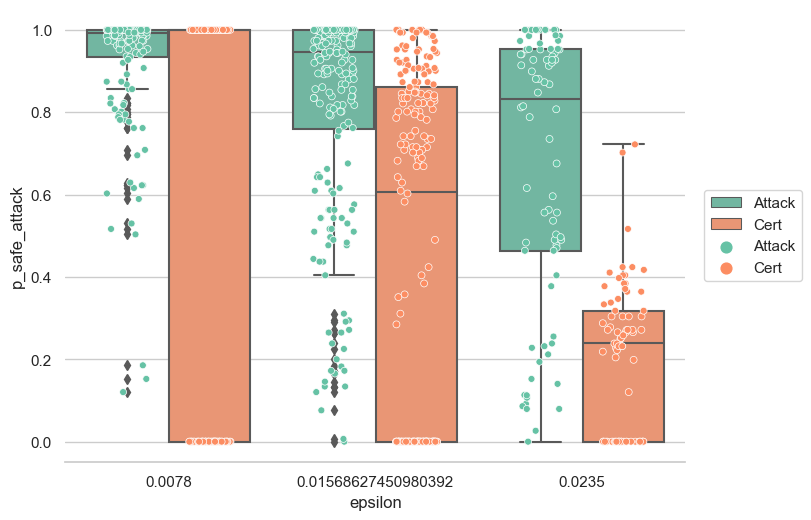

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6), dpi=100)

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


sns.boxplot(x="epsilon", y="p_safe_attack", hue="Method",
                 data=df, palette="Set2")


sns.stripplot(x="epsilon", y="p_safe_attack", hue="Method",
                 data=df, palette="Set2", dodge=True, edgecolor='white', linewidth=0.5, jitter=0.2)

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()

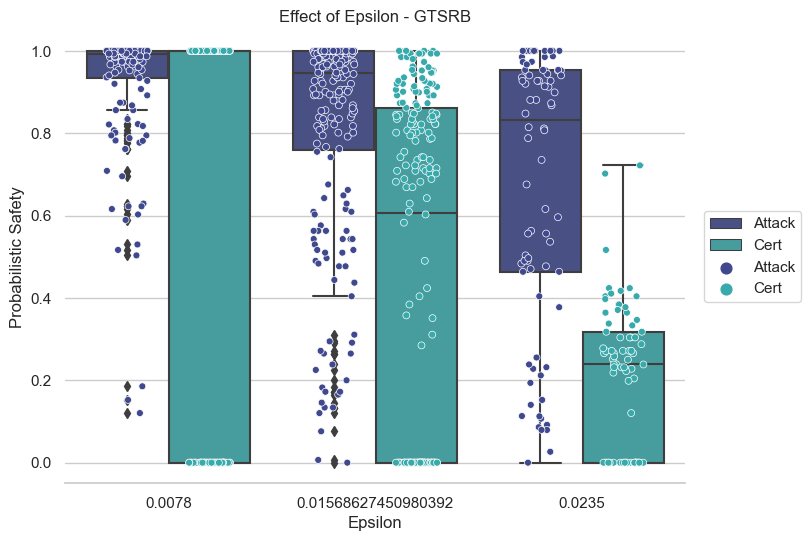

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6), dpi=100)

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


pal = 'mako'
sns.boxplot(x="epsilon", y="p_safe_attack", hue="Method",
                 data=df, palette=pal)



sns.stripplot(x="epsilon", y="p_safe_attack", hue="Method",
                 data=df, palette=pal, dodge=True, edgecolor='white', linewidth=0.5, jitter=0.2)

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.title("Effect of Epsilon - GTSRB")
plt.ylabel("Probabilistic Safety")
plt.xlabel("Epsilon")

plt.show()